In [11]:
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io
import numpy as np

In [2]:
data = pd.read_excel("processed_duration.xlsx")
# Convert DataFrame to Numpy array
data_numpy = data.values 
record = ges(data_numpy)

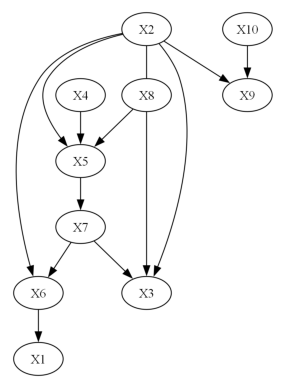

In [4]:
pyd = GraphUtils.to_pydot(record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


#save the graph
pyd.write_png('./algorithm_graphs/ges_duration.png')

In [20]:

data = pd.read_excel("processed_steel.xlsx")
data_numpy = data.values

In [21]:

# Run GES on reduced data
record = ges(data_numpy)

c:\Users\jmeri\AppData\Local\Programs\Python\Python311\Lib\site-packages\causallearn\score\LocalScoreFunction.py:69: RuntimeWarning: divide by zero encountered in log
  return n * np.log(cov[i, i])
c:\Users\jmeri\AppData\Local\Programs\Python\Python311\Lib\site-packages\causallearn\score\LocalScoreFunction.py:73: RuntimeWarning: divide by zero encountered in log
  H = np.log(cov[i, i] - yX @ np.linalg.inv(XX) @ yX.T)
c:\Users\jmeri\AppData\Local\Programs\Python\Python311\Lib\site-packages\causallearn\utils\GESUtils.py:253: RuntimeWarning: invalid value encountered in subtract
  ch_score = score1 - score2


LinAlgError: Singular matrix

In [22]:
# Check for constant columns
constant_cols = [col for col in data.columns if data[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

# Check for NaN/inf
print(f"NaN values: {data.isna().sum().sum()}")
print(f"Inf values: {np.isinf(data.values).sum()}")



Constant columns: ['year']
NaN values: 0
Inf values: 0


In [24]:
# Remove problematic columns
data_clean = data.drop(columns=constant_cols)
# Convert DataFrame to Numpy array
data_clean = data_clean.values 

In [25]:

record = ges(data_clean)

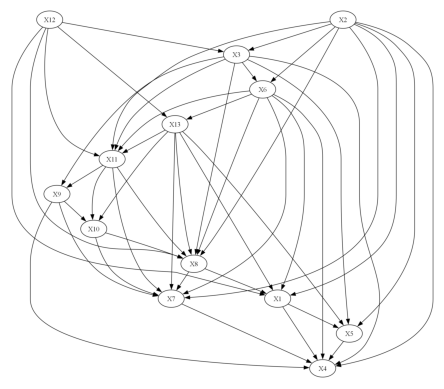

In [27]:
pyd = GraphUtils.to_pydot(record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


#save the graph
pyd.write_png('./algorithm_graphs/ges_steel.png')